In [22]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, balanced_accuracy_score

# Iris data
dataObj = load_iris()

# X data (features)
X = dataObj.data[:, [1, 2]]

# y data
# y = dataObj.target
np.random.seed(0)
y = np.random.randint(3, size=150)

print(np.unique(y))

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1, stratify=y)

# Standardize features
sc = StandardScaler()
sc.fit(X_train)
X_train_std = sc.transform(X_train)
X_test_std = sc.transform(X_test)

# Constructing classifier
svc = SVC(random_state=0, C=10)

# Training
svc.fit(X_train_std, y_train)

[0 1 2]


SVC(C=10, random_state=0)

In [23]:
from sklearn.metrics import confusion_matrix

y_pred = svc.predict(X_test_std)
confusion_matrix(y_true=y_test, y_pred=y_pred)

array([[6, 9, 2],
       [4, 5, 4],
       [7, 6, 2]], dtype=int64)

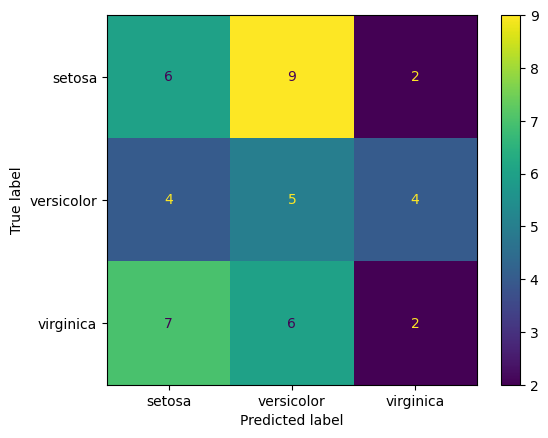

In [24]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(
    estimator=svc, X=X_test_std, y=y_test, display_labels=dataObj.target_names
)
plt.show()  

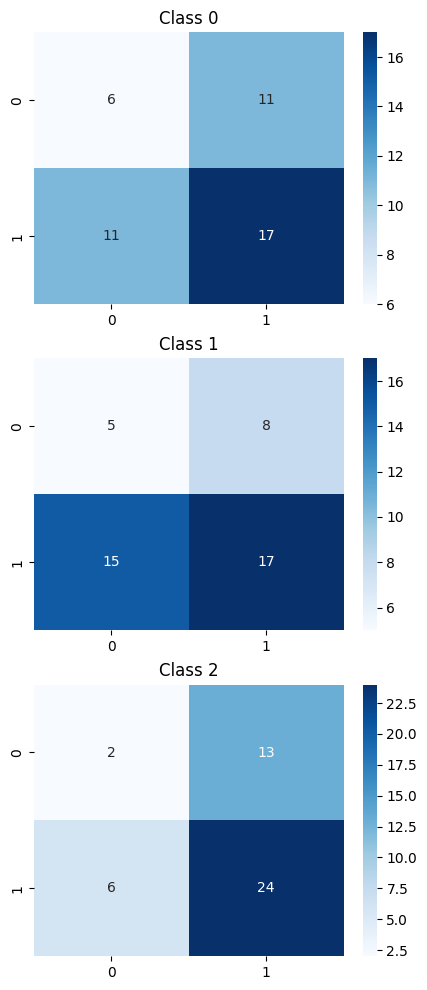

In [25]:
import seaborn as sns
from sklearn.metrics import multilabel_confusion_matrix

#Multilabel confusion matrix
matrices = multilabel_confusion_matrix(y_true=y_test, y_pred=y_pred)
# print(matrices)

nc = np.unique(y).shape[0]
fig, axs = plt.subplots(nc, 1, figsize=(5,nc*4))
for idx, m in enumerate(matrices):
    sns.heatmap(np.flip(m), annot=True, cmap='Blues', ax=axs[idx])
    axs[idx].set_title(f'Class {idx}')

In [26]:
accuracy_score(y_true=y_test, y_pred=y_pred)

0.28888888888888886

In [27]:
balanced_accuracy_score(y_true=y_test, y_pred=y_pred)

0.2902966314731021

In [28]:
precision_score(y_true=y_test, y_pred=y_pred, average=None)

array([0.35294118, 0.25      , 0.25      ])

In [29]:
recall_score(y_true=y_test, y_pred=y_pred, average='macro')

0.2902966314731021

In [30]:
f1_score(y_true=y_test, y_pred=y_pred, average='macro')

0.27662817432638404

In [31]:
acc = accuracy_score(y_test, y_pred)
print(f'Accuracy = {acc:6.5f}')

acc = (6 + 5 + 2) / (45)
print(f'Accuracy = {acc:6.5f}')

Accuracy = 0.28889
Accuracy = 0.28889


In [32]:
# Balanced accuracy (defiend as the macro average of recall obtained on each class)
REC0 = 6 / (6 + 9 + 2)
REC1 = 5 / (5 + 4 + 4)
REC2 = 2 / (2 + 7 + 6)

bal_acc = (REC0 + REC1 + REC2) / 3
print(f'Balanced Accuracy = {bal_acc:6.5f}')

bal_acc = recall_score(y_test, y_pred, average='macro')
print(f'Balanced Accuracy = {bal_acc:6.5f}')

bal_acc = balanced_accuracy_score(y_test, y_pred)
print(f'Balanced Accuracy = {bal_acc:6.5f}')

Balanced Accuracy = 0.29030
Balanced Accuracy = 0.29030
Balanced Accuracy = 0.29030


In [33]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred,  digits=4))

              precision    recall  f1-score   support

           0     0.3529    0.3529    0.3529        17
           1     0.2500    0.3846    0.3030        13
           2     0.2500    0.1333    0.1739        15

    accuracy                         0.2889        45
   macro avg     0.2843    0.2903    0.2766        45
weighted avg     0.2889    0.2889    0.2788        45

